K-Nearest neighbour- Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sb
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [2]:
ds=pd.DataFrame(pd.read_csv("E:\Study\AIDS\DS\ML\Social_Network_Ads.csv"))
ds.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\huzef\AppData\Local\Temp\ipykernel_16824\957890.py:1: SyntaxWarning: invalid escape sequence '\S'
  ds=pd.DataFrame(pd.read_csv("E:\Study\AIDS\DS\ML\Social_Network_Ads.csv"))


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
ds.drop(columns=["User ID","Gender"],inplace=True)
ds.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
ds.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

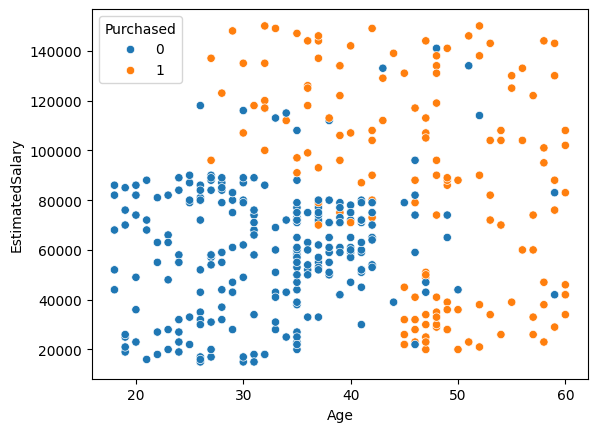

In [5]:
sb.scatterplot(x=ds["Age"],y=ds["EstimatedSalary"],hue=ds["Purchased"])
mat.show()

In [6]:
x=ds.iloc[:,:-1]
y=ds["Purchased"]
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)

StandardScaler()

In [8]:
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
kc=KNeighborsClassifier(n_neighbors=17)
kc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [12]:
kc.score(x_test,y_test)*100


85.3125

In [13]:
kc.score(x_train,y_train)*100

85.0

In [14]:
for i in range(1,30):
    kc1=KNeighborsClassifier(n_neighbors=i)
    kc1.fit(x_train,y_train)
    test=kc1.score(x_test,y_test)*100
    train=kc1.score(x_train,y_train)*100
    print(i, test,train)

1 82.8125 100.0
2 77.8125 88.75
3 89.375 88.75
4 90.3125 86.25
5 92.5 86.25
6 91.875 85.0
7 92.5 86.25
8 91.5625 86.25
9 92.8125 86.25
10 91.25 87.5
11 91.5625 86.25
12 90.625 87.5
13 90.9375 87.5
14 86.875 87.5
15 86.875 87.5
16 84.6875 83.75
17 85.3125 85.0
18 81.5625 80.0
19 82.8125 80.0
20 80.0 78.75
21 80.3125 80.0
22 78.4375 77.5
23 79.6875 78.75
24 76.25 75.0
25 77.8125 76.25
26 75.0 73.75
27 76.5625 75.0
28 74.0625 73.75
29 74.375 73.75


c:\Users\huzef\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


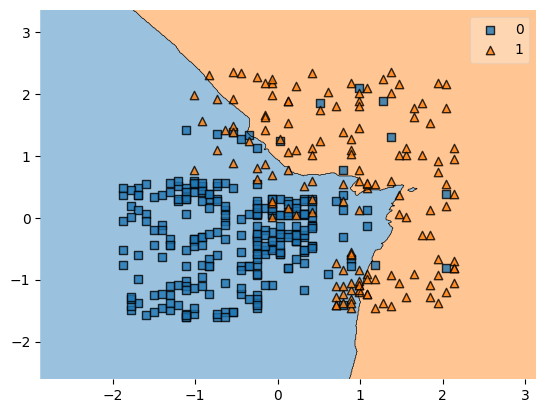

In [15]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=kc)
mat.show()

K Nearest neighbour - Regresiion

In [16]:
df=pd.DataFrame(pd.read_excel("E:\\Study\\AIDS\\DS\\ML\\Age_Experience_Salary_Dataset.xlsx"))
df.head()

,Age,Experience,Salary
0,58,5,108781
1,48,15,190196
2,34,28,73919
3,27,2,196319
4,40,19,151172


In [17]:
df.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

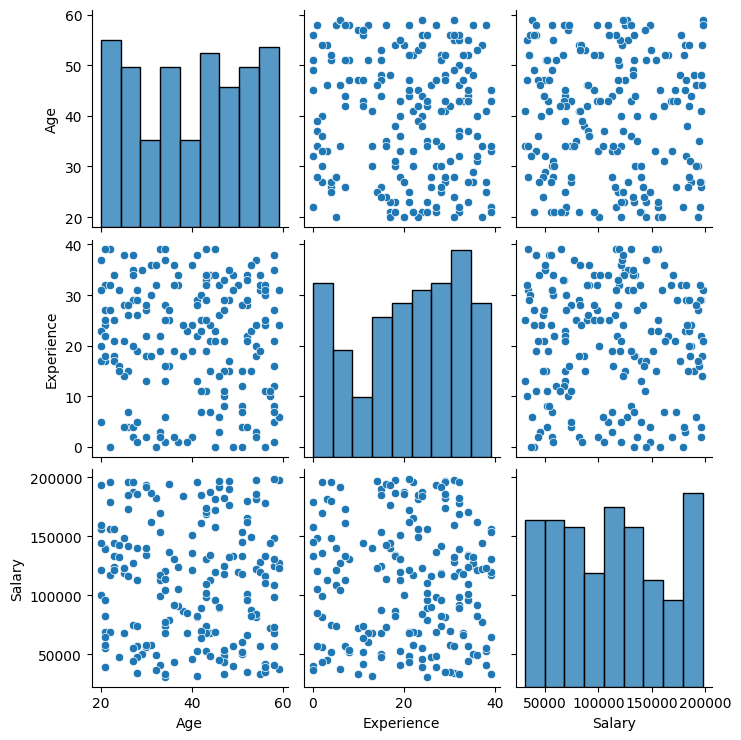

In [18]:
sb.pairplot(df)
mat.show()

In [19]:
x=df["Age_Experiance"]=pd.DataFrame(df["Age"]*df["Experience"])
y=df["Salary"]
x

,0
0,290
1,720
2,952
3,54
4,760
...,...
195,1148
196,390
197,945
198,208


In [20]:
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,0
0,-1.017322
1,-0.191753
2,0.253670
3,-1.470425
4,-0.114956
...,...
195,0.629976
196,-0.825329
197,0.240231
198,-1.174756


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
kr=KNeighborsRegressor(n_neighbors=5)
kr.fit(x_train,y_train)

KNeighborsRegressor()

In [24]:
kr.score(x_test,y_test)*100,kr.score(x_train,y_train)

(-18.404284820325056, 0.04616483062111887)

In [25]:
for i in range(1,30):
    kr1=KNeighborsRegressor(n_neighbors=i)
    kr1.fit(x_train,y_train)
    test=kr1.score(x_test,y_test)*100
    train=kr1.score(x_train,y_train)*100
    print(i, test,          train)

1 -82.88807416201114 99.94891573556089
2 -80.62883659756497 53.439212300028906
3 -42.73313687416034 33.90700393954348
4 -26.15482722526943 8.116297876685042
5 -18.404284820325056 4.616483062111887
6 -12.956369550882885 8.36269124185305
7 -12.25010973892302 12.546318175753079
8 -13.784899621590485 13.750754033348066
9 -14.462756798038168 14.935510463486978
10 -12.585178625427119 15.138785375251596
11 -11.24557920992666 12.563326675771991
12 -10.754089365938402 10.569362938888084
13 -11.110180521055458 5.54524139574254
14 -9.620905206475715 6.656548066101198
15 -6.736525543918859 5.46349334735432
16 -7.7859687512592535 5.762445251764047
17 -6.583974452768349 7.365826831030975
18 -5.708653113021711 4.567305087621898
19 -5.850066774672258 3.1492397359147772
20 -6.18015904334972 5.770021895536493
21 -6.684575583991292 9.273084622550332
22 -6.899538904904379 7.176675611215744
23 -6.792020621323425 3.206537174648849
24 -5.60108925927334 2.4325937921913177
25 -4.9932699814243975 2.542025055578

In [26]:
from sklearn.linear_model import LinearRegression


In [27]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.score(x_test,y_test),lr.score(x_train,y_train)

(-0.01563848786382449, 0.0037216117614826683)

KeyboardInterrupt: 

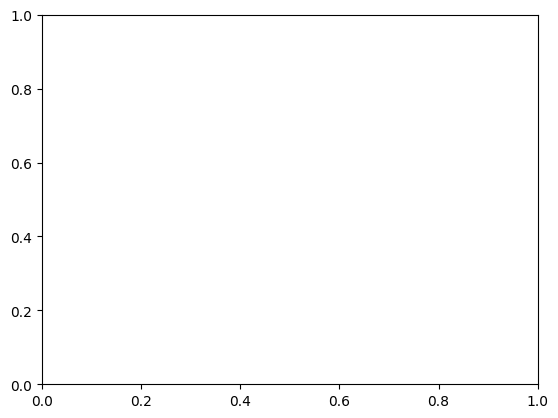

In [29]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
mat.show()

In [31]:
from sklearn.svm import SVR

In [32]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [33]:
svr.score(x_test,y_test)

-0.015132312109276125

KeyboardInterrupt: 

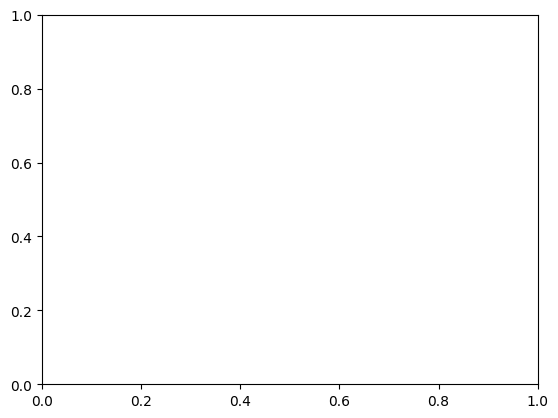

In [34]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=svr)
mat.show()